In [88]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [89]:
sect_df = pd.read_csv('data/FH-base_sektorit_ver3_28MAR22.csv', sep=';')

In [90]:
sect_df

,fid,Tukikohta,Kuvaus,distance,Sector,Sector_no,dep_vfr,alt_open_ifr,alt_all_ifr,sect_wx,...,dep_ifr,dest_ifr,asema,elev_m,luokka,elev_ft,ruutu_id,min_ifr_ft,GND_max_m,cld_ceiling
0,21,FH10,Helsinki-Vantaan lentoasema,100000.0,1,FH10.1,EFHK,EFTP;EFTU,EFUT;EFTP;EFTU;EFHA;EFLP;EFMI;EFPO,ILZQ,...,EFHK,EFHK,Mäntsälä Hirvihaara,100,AWS-asema,272,25-60.5,2800,180,2500
1,20,FH10,Helsinki-Vantaan lentoasema,100000.0,2,FH10.2,EFHK,EFTP;EFTU,EFUT;EFTP;EFTU;EFHA;EFLP;EFMI;EFPO,ILZV,...,EFHK,EFHK,Porvoo Harabacka,22,AWS-asema,72,25.5-60,1800,94,1700
2,34,FH10,Helsinki-Vantaa lentoasema,40000.0,9,FH10.4,EFHK,EFTP;EFTU,EFUT;EFTP;EFTU;EFHA;EFLP;EFMI;EFPO,ILZA,...,EFHK,EFHK,Helsinki Harmaja,6,AWS-asema,20,24.5-60,2200,136,2200
3,9,FH10,Helsinki-Vantaan lentoasema,100000.0,6,FH10.6,EFHK,EFTP;EFTU,EFUT;EFTP;EFTU;EFHA;EFLP;EFMI;EFPO,ILZS,...,EFHK,EFHK,Inkoo Bågaskär,13,AWS-asema,43,24-59.5,1500,35,1500
4,10,FH10,Helsinki-Vantaan lentoasema,100000.0,7,FH10.7,EFHK,EFTP;EFTU,EFUT;EFTP;EFTU;EFHA;EFLP;EFMI;EFPO,ILIK,...,EFHK,EFHK,Salo Kiikala lentokenttä,117,AWS-asema,384,23.5-60,2000,165,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,43,FH80,Kouvolan tukikohta (ehdotus),100000.0,2,FH80.2,EFUT,EFHK;EFJY;EFTP,EFLP;EFMI;EFHK;EFHA;EFSA;EFJY;EFTP,EFLP,...,EFUT,EFUT,Lappeenranta lentoasema,83,AWS-asema,272,27.5-62,2200,199,1900
84,36,FH80,Kouvolan tukikohta (ehdotus),100000.0,4,FH80.4,EFUT,EFHK;EFJY;EFTP,EFLP;EFMI;EFHK;EFHA;EFSA;EFJY;EFTP,ILWA,...,EFUT,EFUT,Kotka Rankki,11,AWS-asema,36,26.5-60,1600,48,1600
85,29,FH80,Kouvolan tukikohta (ehdotus),100000.0,6,FH80.6,EFUT,EFHK;EFJY;EFTP,EFLP;EFMI;EFHK;EFHA;EFSA;EFJY;EFTP,ILZV,...,EFUT,EFUT,Porvoo Harabacka,22,AWS-asema,72,25.5-60,1800,94,1700
86,27,FH80,Kouvolan tukikohta (ehdotus),100000.0,8,FH80.8,EFUT,EFHK;EFJY;EFTP,EFLP;EFMI;EFHK;EFHA;EFSA;EFJY;EFTP,ILWD,...,EFUT,EFUT,Joutsa Savenaho,145,AWS-asema,476,26-61.5,2100,229,1600


In [91]:
sect_wx = sect_df['sect_wx'].unique()

In [92]:
vfr_wx_l = list(sect_df['vfr_wx'])
vfr_wx = [s.split(';') for s in vfr_wx_l]
vfr_wx = np.array([s for sublist in vfr_wx for s in sublist])
vfr_wx = np.unique(vfr_wx)

In [93]:
dep_vfr = sect_df['dep_vfr'].unique()

In [94]:
icaos = np.unique(np.concatenate((sect_wx, vfr_wx, dep_vfr)))
icaos

array(['EFET', 'EFHA', 'EFHK', 'EFIV', 'EFJO', 'EFJY', 'EFKE', 'EFKI',
       'EFKK', 'EFKS', 'EFKT', 'EFKU', 'EFLP', 'EFMI', 'EFOU', 'EFRO',
       'EFSA', 'EFSI', 'EFTP', 'EFTU', 'EFUT', 'EFVA', 'ILIK', 'ILKA',
       'ILKM', 'ILMI', 'ILPU', 'ILQA', 'ILQE', 'ILQH', 'ILQI', 'ILQJ',
       'ILQN', 'ILQO', 'ILQP', 'ILQQ', 'ILQS', 'ILQU', 'ILQV', 'ILQY',
       'ILRU', 'ILWA', 'ILWD', 'ILWF', 'ILXA', 'ILXC', 'ILXE', 'ILXF',
       'ILXI', 'ILXK', 'ILXL', 'ILXN', 'ILXO', 'ILXP', 'ILXR', 'ILXS',
       'ILXT', 'ILXV', 'ILXW', 'ILYL', 'ILZA', 'ILZF', 'ILZI', 'ILZJ',
       'ILZK', 'ILZL', 'ILZP', 'ILZQ', 'ILZS', 'ILZT', 'ILZU', 'ILZV'],
      dtype=object)

In [95]:
counts = {}
for icao in icaos:
    files = glob.glob('data/metar/{}*'.format(icao))
    counts[icao] = len(files)
    print(icao, len(files))

EFET 11
EFHA 11
EFHK 11
EFIV 11
EFJO 11
EFJY 11
EFKE 11
EFKI 11
EFKK 11
EFKS 11
EFKT 11
EFKU 11
EFLP 11
EFMI 11
EFOU 11
EFRO 11
EFSA 11
EFSI 11
EFTP 11
EFTU 11
EFUT 11
EFVA 11
ILIK 11
ILKA 7
ILKM 11
ILMI 8
ILPU 11
ILQA 11
ILQE 11
ILQH 11
ILQI 11
ILQJ 11
ILQN 11
ILQO 11
ILQP 11
ILQQ 11
ILQS 11
ILQU 11
ILQV 11
ILQY 9
ILRU 11
ILWA 7
ILWD 5
ILWF 4
ILXA 11
ILXC 11
ILXE 11
ILXF 9
ILXI 11
ILXK 11
ILXL 9
ILXN 11
ILXO 11
ILXP 11
ILXR 11
ILXS 11
ILXT 11
ILXV 11
ILXW 10
ILYL 11
ILZA 11
ILZF 8
ILZI 11
ILZJ 11
ILZK 11
ILZL 11
ILZP 11
ILZQ 7
ILZS 11
ILZT 11
ILZU 11
ILZV 11


In [96]:
df = pd.DataFrame(counts.items(), columns=['icao', 'count'])

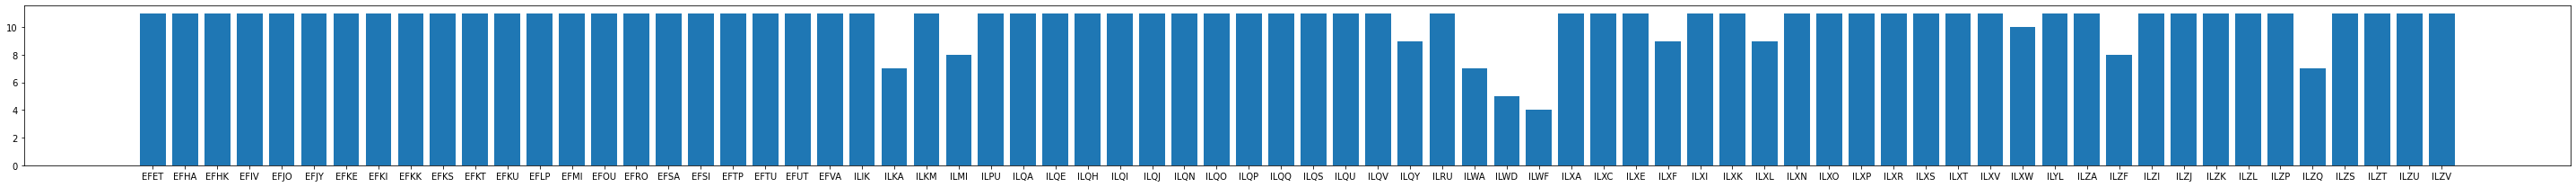

In [97]:
fig, ax = plt.subplots(figsize=(40, 3))
plt.bar(df['icao'], height=df['count'])
plt.tight_layout()
plt.savefig('output/metar_filecount.png', dpi=300)

In [98]:
df

,icao,count
0,EFET,11
1,EFHA,11
2,EFHK,11
3,EFIV,11
4,EFJO,11
...,...,...
67,ILZQ,7
68,ILZS,11
69,ILZT,11
70,ILZU,11


In [99]:
df[df['count'] < 6]

,icao,count
42,ILWD,5
43,ILWF,4


In [100]:
vfr_wx_l

['ILZQ;EFHK',
 'ILZV;EFHK',
 'ILZA;EFHK',
 'ILZS;EFHK',
 'ILIK;EFHK',
 'ILZL;EFHK',
 'EFHK',
 'ILZP;EFTU',
 'ILZJ;EFTU',
 'ILIK;EFTU',
 'ILZT;EFTU',
 'ILZU;EFTU',
 'ILZK;EFTU',
 'ILZI;EFTU',
 'ILZF;EFTU',
 'EFTU',
 'ILXA;EFTP',
 'EFHA;EFTP',
 'ILZL;EFTP',
 'ILZJ;EFTP',
 'ILZP;EFTP',
 'ILXN;EFTP',
 'ILXO;EFTP',
 'ILWD;EFHA;EFTP',
 'ILXP;ILXN;EFTP',
 'EFTP',
 'ILKA;EFSI',
 'ILXL;EFSI',
 'ILXA;EFSI',
 'ILXA;EFSI',
 'ILXN;EFSI',
 'ILXO;EFSI',
 'EFVA;EFSI',
 'EFKK;ILKA;EFSI',
 'ILXV;ILXL;EFSI',
 'EFJY;ILXA;EFSI',
 'EFSI',
 'ILRU;EFOU',
 'ILPU;EFOU',
 'ILQY;EFOU',
 'ILXW;EFOU',
 'ILYL;EFOU',
 'ILQP;EFOU',
 'ILQH;EFOU',
 'ILQJ;EFOU',
 'ILWF;ILPU;EFOU',
 'EFKI;ILQY;EFOU',
 'ILXT;ILQP;EFOU',
 'ILQQ;ILQJ;EFOU',
 'ILQS;ILQY;EFOU',
 'EFOU',
 'ILQO;EFRO',
 'ILKM;EFRO',
 'ILRU;EFOU',
 'EFKE;EFRO',
 'ILQE;EFRO',
 'EFKT;EFRO',
 'ILQV;ILQO;EFRO',
 'ILQA;ILKM;EFRO',
 'EFKS;ILKM;EFRO',
 'ILPU;ILRU;EFOU',
 'ILQJ;EFKE;EFRO',
 'ILQI;EFKT;EFRO',
 'EFIV;ILQV;ILQO;EFRO',
 'EFET;ILQI;EFKT;EFRO',
 'ILQU;EFIV;ILQ

In [101]:
sect_df[sect_df['dep_vfr'] != sect_df['dest_vfr']]

,fid,Tukikohta,Kuvaus,distance,Sector,Sector_no,dep_vfr,alt_open_ifr,alt_all_ifr,sect_wx,...,dep_ifr,dest_ifr,asema,elev_m,luokka,elev_ft,ruutu_id,min_ifr_ft,GND_max_m,cld_ceiling


In [102]:
df

,icao,count
0,EFET,11
1,EFHA,11
2,EFHK,11
3,EFIV,11
4,EFJO,11
...,...,...
67,ILZQ,7
68,ILZS,11
69,ILZT,11
70,ILZU,11
